<a href="https://colab.research.google.com/github/jasmineA20/Hydrogen/blob/main/Project_mini_mod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This program computes and plots the electron probability distribution for different hydrogen orbitals. More information on the mathematical background and methods included in the paper. 

In [16]:
import numpy as np
import scipy as sp
import scipy.special as sps
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

For calculating the hydrogen atom orbitals, the two special functions in scipy eval_genlaguerre (for evaluating the associated laguerre polynomials), sph_harm (to generate the spherical harmonics for given l,m,θ,Φ). \\

This function essential maps the position of the space to a certain probability. 


In [17]:
def h_orbital(r,theta,phi,n,l,m):
    #odd thing: θ is the azimuthal angle in scipy sph_harm documentation
    #so, theta->[0,2*pi] , phi-> [0,pi]
    f = ( (2./n)**3. * sps.factorial(n-l-1) / (2. * n * sps.factorial(n+l)) )**0.5
    return f * np.exp(-r/n) *((2*r)/n)**l * sps.sph_harm(m,l,theta,phi) * sps.eval_genlaguerre(n-l-1,2*l+1,r)

In [18]:
r = np.linspace(0,10,101) #creating an array of 101 points evenly spaced from 0 to 10 (inclusive)
t = np.linspace(0,np.pi,101)
p = np.linspace(0,2.*np.pi,101)

rp, th, ph = np.meshgrid(r,t,p,indexing='ij',sparse=True) #function assigns a certain probability to each point of this grid

Now starting with 1D visualization of the orbitals. 1s,2s and 2p orbitals 

In [19]:
#Not taking the norm squared here to get the distance of the probability distribution from the origin since 
#that makes the makes the ground state part tricky where 100 looks like an asyptotic function(reference from Griffiths textbook)
#here is doesnt actually go to infinity but the scale makes it harder to see other wavefunctions.
psi_1s  = h_orbital(rp,th,ph,1,0,0)
psi_2s  = h_orbital(rp,th,ph,2,0,0)
psi_2p0 = h_orbital(rp,th,ph,2,1,0)
psi_2p1 = h_orbital(rp,th,ph,2,1,1)
psi_3s  = h_orbital(rp,th,ph,3,0,0)
psi_4s  = h_orbital(rp,th,ph,4,0,0)

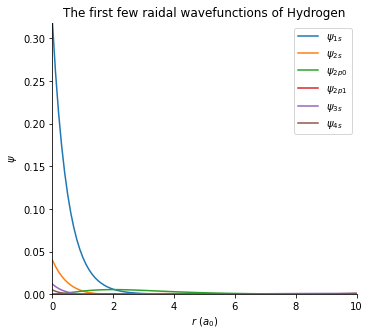

In [45]:
fig1 = plt.figure(figsize=(12,5))
#Creating a new Axis will delete any pre-existing Axes that overlap beyond the shared boundary w
#which would not be convenient so using pyplot.axes 
ax1 = fig1.add_subplot(121,frameon = True)
#plotting r w.r.t. the real part of the orbital value obtained from h_orbital
ax1.plot(rp[:,0,0],np.real(np.conj(psi_1s[:,0,0])*psi_1s[:,0,0]),label='$\psi_{1s}$')
ax1.plot(rp[:,0,0],np.real(np.conj(psi_2s[:,0,0])*psi_2s[:,0,0]),label='$\psi_{2s}$')
ax1.plot(rp[:,0,0],np.real(np.conj(psi_2p0[:,0,0])*psi_2p0[:,0,0]),label='$\psi_{2p0}$')
ax1.plot(rp[:,0,0],np.real(np.conj(psi_2p1[:,0,0])*psi_2p0[:,0,0]),label='$\psi_{2p1}$')
ax1.plot(rp[:,0,0],np.real(np.conj(psi_3s[:,0,0])*psi_3s[:,0,0]),label='$\psi_{3s}$')
ax1.plot(rp[:,0,0],np.real(np.conj(psi_4s[:,0,0])*psi_4s[:,0,0]),label='$\psi_{4s}$')
ax1.margins(x=0.0005, y=0.0005) 
ax1.set_xlabel('$r$ ($a_0$)')
ax1.set_ylabel('$\psi$')

ax1.spines['left'].set_position('zero')
ax1.spines['right'].set_color('none')
ax1.spines['bottom'].set_position('zero')
ax1.spines['top'].set_color('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.title('The first few raidal wavefunctions of Hydrogen')
ax1.legend()

2D visualization. One plot shows the magnitude of the complex number z and the other one shows rhe phase. Polar plot is used for easier visualization since angular data is being plotted. 

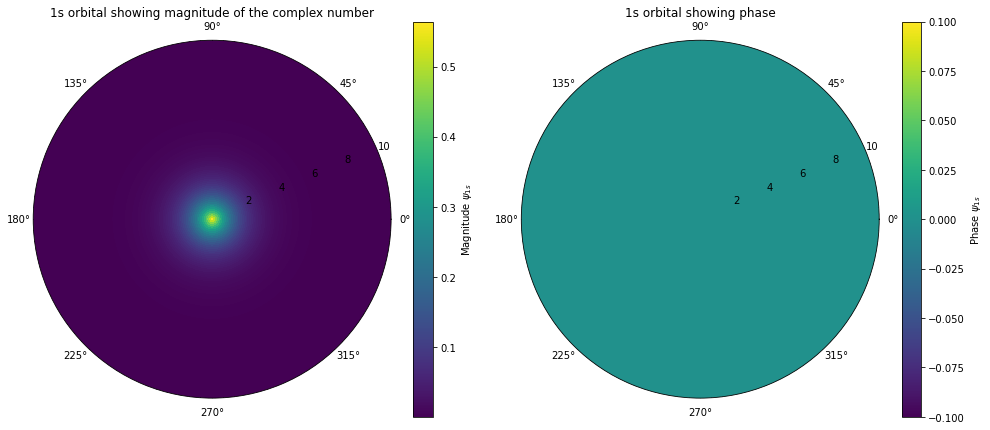

In [7]:
fig2 = plt.figure(figsize=(14,6))
ax2 = fig2.add_subplot(1,2,1,projection='polar')
mesh = ax2.pcolormesh(ph[0,0,:],rp[:,0,0],np.absolute(psi_1s[:,0,:]),shading='auto')
cbar = fig2.colorbar(mesh) # Adding a colorbar
cbar.set_label("Magnitude $\psi_{1s}$")
plt.title('1s orbital showing magnitude of the complex number')

ax3 = fig2.add_subplot(1,2,2,projection='polar')
mesh2 = ax3.pcolormesh(ph[0,0,:],rp[:,0,0],np.angle(psi_1s[:,0,:]),shading='auto')
cbar2 = fig2.colorbar(mesh2,ax=ax3)# Adding a colorbar
cbar2.set_label("Phase $\psi_{1s}$")
plt.title('1s orbital showing phase')

fig2.tight_layout()

2D visualization for the 2p shell. Plotting phi as a function of z. 



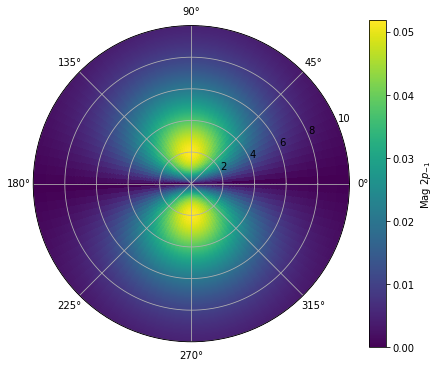

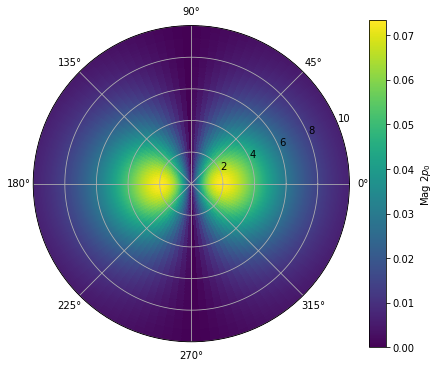

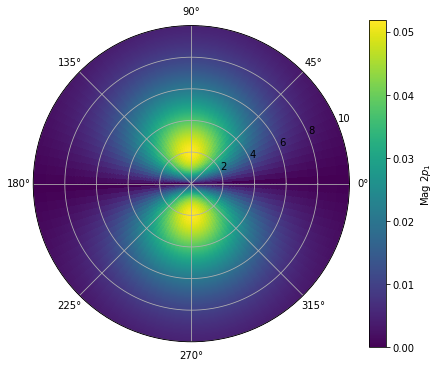

In [8]:
r = np.linspace(0,10.,1000,endpoint=False)
t = np.linspace(0,np.pi,100,endpoint=True)

r3, th3, ph3 = np.meshgrid(r,t,p,indexing='ij',sparse=True)
p = np.linspace(0,2*np.pi,100,endpoint=False)

def r_phi_plot(r,phi,psi,label):
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(1,2,1,projection='polar')

    mesh = ax.pcolormesh(phi,r,np.absolute(psi),shading='auto')
    cbar = fig.colorbar(mesh) 
    cbar.set_label("Mag "+label)
    ax.grid()

    #ax2 = fig.add_subplot(1,2,2,projection='polar')
    #mesh2 = ax2.pcolormesh(phi,r,np.angle(psi),shading='auto')
    #cbar2 = fig.colorbar(mesh2,ax=ax2)
    #cbar2.set_label("Phase "+label)
    #ax2.grid()
    
    fig.tight_layout()
    return fig

r_plot = np.linspace(0,10.,1001,endpoint=True)
p_plot = np.linspace(0,2*np.pi,101,endpoint=True)

rp_plot, th_plot, ph_plot = np.meshgrid(r_plot,t,p_plot,indexing='ij',sparse=True)

#This is the first trial specific to the 2p orbital since the m_l goes from -(l-1) to (l-1)
#The general case is implemented right after this 
p_orb_figs = []
for m in [-1,0,1]:
    psi = h_orbital(r3,th3,ph3,2,1,m) 
    label = f"$2p_{{{m}}}$"
    p_orb_figs.append(r_phi_plot(rp_plot[:,0,0],ph_plot[0,0,:],psi[:,0,:],label))

In [ ]:
#difficulty in the 2D and 3D plot most likely because of the way r,theta,phi was spaced 
#defining a function which takes cartesian coordinates X,Y,and Z 

In [9]:
def h_orbital2(X,Y,Z,n,l,m):
    #converting cartesian to polar coordinates 
    r = np.sqrt(X**2+Y**2+Z**2)
    theta = np.arccos(Z/r)
    phi = np.arctan2(Y,X)

    f = ( (2./n)**3. * sps.factorial(n-l-1) / (2. * n * sps.factorial(n+l)) )**0.5
    orbital= f * np.exp(-r/2.) *r**l * sps.sph_harm(m,l,phi,theta) * sps.eval_genlaguerre(n-l-1,2*l+1,r)
    orbital = np.nan_to_num(orbital) #replacing NaN with 0 and infinity with large but computable numbers to handle anomalous cases.
    return orbital 

In [10]:
h     = 0.5
min   = -10
max   = 10
x     = np.arange(min,max,h)
y     = np.arange(min,max,h)
z     = np.arange(min,max,h)
X,Y,Z = np.meshgrid(x,y,z) #X, Y, Z are 3d arrays that tell us the values of x, y, and z at every point in space
n     = 4
l     = 3
m     = 1
psi   = h_orbital2(X,Y,Z,n,l,m)
psi   = abs(psi)**2
R     = np.sqrt(X**2+Y**2+Z**2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Probability density plot for nlm =  $_{431}$')

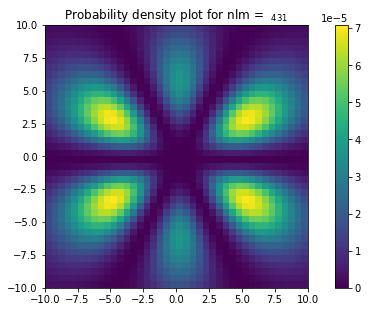

In [14]:
fig = plt.figure(figsize=(10,5))
ax  = fig.add_subplot()
plt.subplots_adjust(left=0.15, bottom=0.15)
im = plt.imshow(psi[int((0-min)/h),:,:], vmin=0, vmax = np.max(psi), extent=[min,max,min,max])
plt.colorbar()# Adding a colorbar
label = f"$_{{{n}{l}{m}}}$"
plt.title('Probability density plot for nlm =  '+label)

Finally, 3D Visualization. 

In [47]:
import skimage
from skimage import measure

In [48]:
import plotly.graph_objects as go

In [49]:
n=2
l=1
m=1

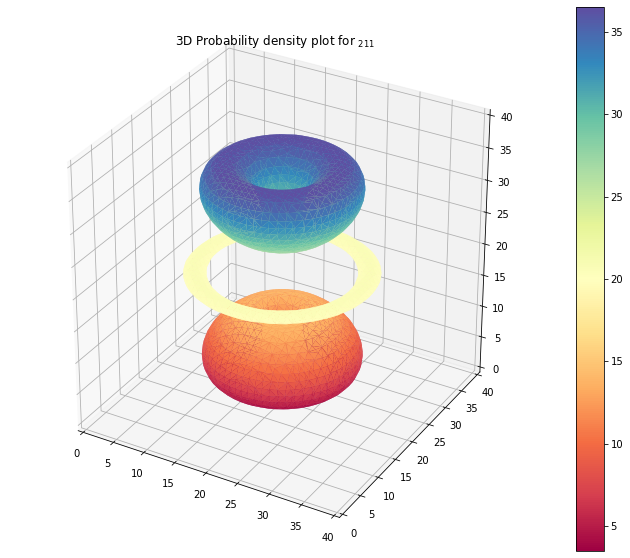

In [50]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([0,len(x)])
ax.set_ylim([0,len(y)])
ax.set_zlim([0,len(z)])
max_val = np.max(psi)
#plotting the x-z plane
#using marching cubes to obtain the 3D surface mesh. It iterates over a uniform grid of cubes superimposed over a region of the function
#the small triangles that form the surface below are generated based on how the cubes are superposed.
verts, faces, normals, values = measure.marching_cubes_lewiner(psi, max_val/2, spacing = (1,1,1))
#3D plot with trisurf for plotting an arbitrary collection of datapoints as a 3D surface
result=ax.plot_trisurf(verts[:,0], verts[:,1], faces, verts[:,2],cmap ='Spectral', lw=0)
label = f"$_{{{n}{l}{m}}}$"
fig.colorbar(result)
plt.title('3D Probability density plot for '+label)
plt.show()



Putting all this together and creating a main function that calls the 2D and 3D visualization for any value of n,l,m the user enters. 

In [51]:
def TwoD(n,l,m):

    def h_orbital2(X,Y,Z,n,l,m):

      r = np.sqrt(X**2+Y**2+Z**2)
      theta = np.arccos(Z/r)
      phi = np.arctan2(Y,X)

      f = ( (2./n)**3. * sps.factorial(n-l-1) / (2. * n * sps.factorial(n+l)) )**0.5
      orbital= f * np.exp(-r/n) *((2*r)/n)**l * sps.sph_harm(m,l,phi,theta) * sps.eval_genlaguerre(n-l-1,2*l+1,r)
      orbital = np.nan_to_num(orbital)
      return orbital 

    h     = 0.5
    min   = -20
    max   = 20
    x     = np.arange(min,max,h)
    y     = np.arange(min,max,h)
    z     = np.arange(min,max,h)
    X,Y,Z = np.meshgrid(x,y,z)

    psi   = h_orbital2(X,Y,Z,n,l,m)
    psi   = abs(psi)**2
    R     = np.sqrt(X**2+Y**2+Z**2)

    fig = plt.figure(figsize=(10,5))
    ax  = fig.add_subplot()
    plt.subplots_adjust(left=0.15, bottom=0.15)
    #plot in cartesian coordinates
    im = plt.imshow(psi[int((0-min)/h),:,:], vmin=0, vmax = np.max(psi), extent=[min,max,min,max])
    # Adding a colorbar
    label = f"$_{{{n}{l}{m}}}$"
    plt.title('Probability density plot for nlm =  '+label)
    return fig 
    

In [54]:
def ThreeD(n,l,m):

    def h_orbital2(X,Y,Z,n,l,m):

      r = np.sqrt(X**2+Y**2+Z**2)
      theta = np.arccos(Z/r)
      phi = np.arctan2(Y,X)

      f = ( (2./n)**3. * sps.factorial(n-l-1) / (2. * n * sps.factorial(n+l)) )**0.5
      orbital= f * np.exp(-r/2.) *r**l * sps.sph_harm(m,l,phi,theta) * sps.eval_genlaguerre(n-l-1,2*l+1,r)
      orbital = np.nan_to_num(orbital)
      return orbital 

    h     = 0.5
    min   = -20
    max   = 20
    x     = np.arange(min,max,h)
    y     = np.arange(min,max,h)
    z     = np.arange(min,max,h)
    X,Y,Z = np.meshgrid(x,y,z)

    psi   = h_orbital2(X,Y,Z,n,l,m)
    psi   = abs(psi)**2
    R     = np.sqrt(X**2+Y**2+Z**2)

    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim([0,len(x)])
    ax.set_ylim([0,len(y)])
    ax.set_zlim([0,len(z)])
    max_val = np.max(psi)

    verts, faces, _, _ = measure.marching_cubes_lewiner(psi, max_val/2, spacing = (1,1,1))
    result=ax.plot_trisurf(verts[:,0], verts[:,1], faces, verts[:,2],cmap ='Spectral', lw=0)
    label = f"$_{{{n}{l}{m}}}$"
    plt.colorbar(result)
    plt.title('Probability density plot for '+label)
    return fig 
    

enter n 4
enter l 3
enter m 1
Enter 1 for 2D density plot, 2 for 3D density plot and anything else for both 4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in true_divide



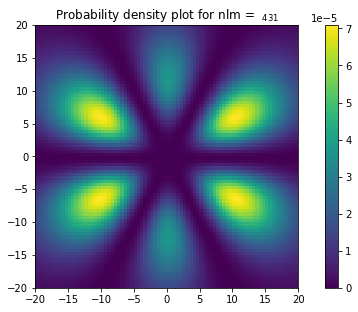

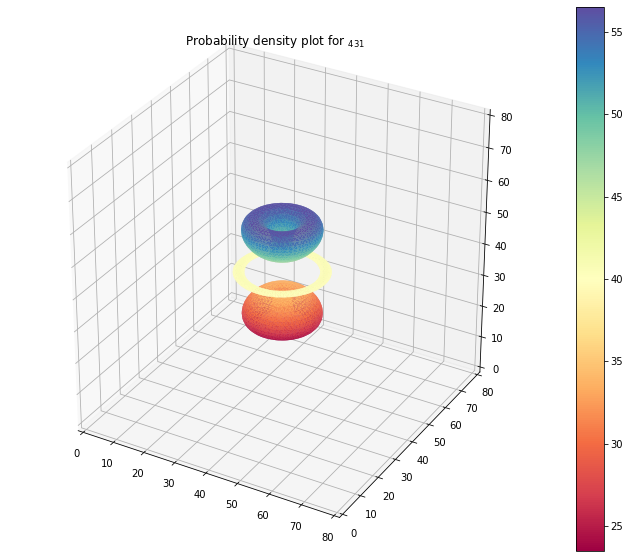

In [55]:
def main():
  # ask for appropriate quantum numbers
  n = int(input('enter n '))
  while n<1:
	  print ("Invalid")
	  n = int(raw_input("n? "))
   
  l = int(input('enter l '))
  while l>=n or l<0:
	  print ("Invalid.")
	  l = int(input('enter l '))
  m = int(input('enter m '))
  while np.abs(m)>l:
	  print ("Invalid.")
	  m = intint(input('enter m '))

	#plots
  #r = int(input("Input r "))
  #th = int(input("Input theta "))
  #ph = int(input("Input phi "))
  ask = int(input("Enter 1 for 2D density plot, 2 for 3D density plot and anything else for both "))
  if ask == 1 : 
    TwoD(n,l,m) 
  elif ask ==2: 
    ThreeD(n,l,m) 
  else:
    TwoD(n,l,m) 
    ThreeD(n,l,m) 

if __name__=="__main__":
	# pdb.set_trace()
	main()

In [ ]:
#Would be cool to finish up with an interactive model but that seems a little too tricky for now
import plotly.figure_factory as ff
import numpy as np
from scipy.spatial import Delaunay

In [ ]:
u = np.arange(0,2.*np.pi,101)
v = np.arange(0,2.*np.pi,101)
u,v = np.meshgrid(u,v)
u = u.flatten()
v = v.flatten()

x = verts[:,0] 
y = verts[:,1] 
z = verts[:,2]

points2D = np.vstack([u,v]).T
#tri = Delaunay(points2D)
#simplices = tri.simplices

#fig = ff.create_trisurf(x=x, y=y, z=z,simplices=simplices,title="Interactive", aspectratio=dict(x=1, y=1, z=0.3))
#fig.show()